In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
def linear_expression(x):
    return 5 * x + 6

In [ ]:
# по признакам сгенерируем значения таргетов с некоторым шумом
objects_num = 50
X = np.linspace(-5, 5, objects_num)
y = linear_expression(X) + np.random.randn(objects_num) * 5

# выделим половину объектов на тест
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

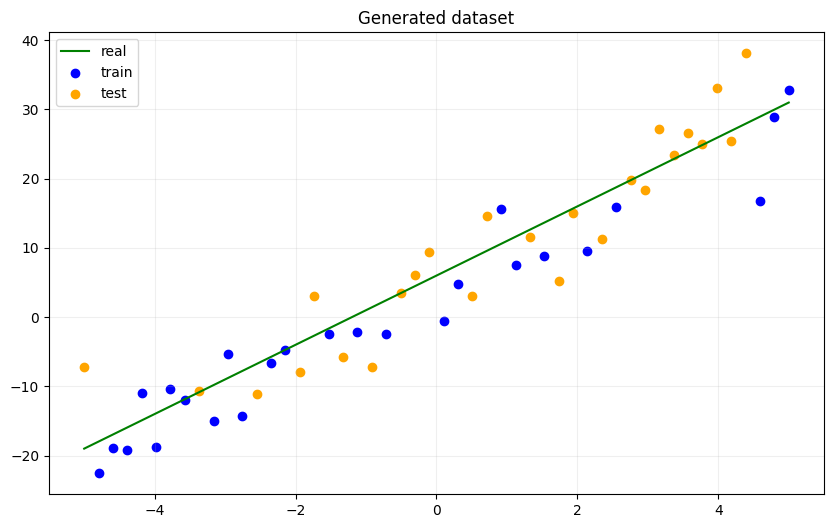

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(X, linear_expression(X), label='real', c='g')
plt.scatter(X_train, y_train, label='train', c='b')
plt.scatter(X_test, y_test, label='test', c='orange')

plt.title("Generated dataset")
plt.grid(alpha=0.2)
plt.legend()
plt.show()

In [ ]:
class MyLinearRegression():
    def __init__(self):
        self.w = None

    def __calc_gradient__(self, X, y, y_pred):
        grad = (2. / X.shape[0]) * (X.T @ (y_pred - y))

        return grad

    def fit(self, X, y, lr=0.01, max_iter=100):
        X = np.array(X)
        y = np.array(y)

        y = y[:, np.newaxis]
        l, n = X.shape

        X_train = np.hstack((X, np.ones((l, 1))))

        self.w = np.random.randn(n + 1, 1)

        self.losses = []

        for _ in range(max_iter):
            y_pred = self.predict(X)
            self.losses.append(mean_squared_error(y, y_pred))

            grad = self.__calc_gradient__(X_train, y, y_pred)

            self.w -= lr * grad
    
    def predict(self, X):
        l, n = X.shape

        X_train = np.hstack((X, np.ones((l, 1))))

        y_pred = X_train @ self.w

        return y_pred

    def get_weights(self):
        return self.w.copy()

    def get_losses(self):
        return self.losses

In [ ]:
class MySGDLinearRegression(MyLinearRegression):
    def __init__(self):
        super().__init__()

    def fit(self, X, y, lr=0.01, max_iter=100):
        X = np.array(X)
        y = np.array(y)

        y = y[:, np.newaxis]
        l, n = X.shape

        X_train = np.hstack((X, np.ones((l, 1))))

        self.w = np.random.randn(n + 1, 1)

        self.losses = []

        for _ in range(max_iter):
            random_idx = np.random.randint(0, len(X))

            y_pred = self.predict(X[random_idx:random_idx+1])
            self.losses.append(mean_squared_error(y[random_idx:random_idx+1], y_pred))

            grad = self.__calc_gradient__(X_train[random_idx:random_idx+1], y[random_idx:random_idx+1], y_pred)

            self.w -= lr * grad

In [ ]:
class MyMiniBatchGDLinearRegression(MyLinearRegression):
    def __init__(self):
        super().__init__()

    def fit(self, X, y, lr=0.01, max_iter=100, batch_size=10):
        X = np.array(X)
        y = np.array(y)

        y = y[:, np.newaxis]
        l, n = X.shape

        X_train = np.hstack((X, np.ones((l, 1))))

        self.w = np.random.randn(n + 1, 1)

        self.losses = []

        for _ in range(max_iter):
            random_indices = np.random.choice(len(X_train), size=batch_size, replace=False)

            y_pred = self.predict(X[random_indices])
            self.losses.append(mean_squared_error(y[random_indices], y_pred))

            grad = self.__calc_gradient__(X_train[random_indices], y[random_indices], y_pred)

            self.w -= lr * grad

In [ ]:
lr = MyLinearRegression()
lr.fit(X_train[:, np.newaxis], y_train)

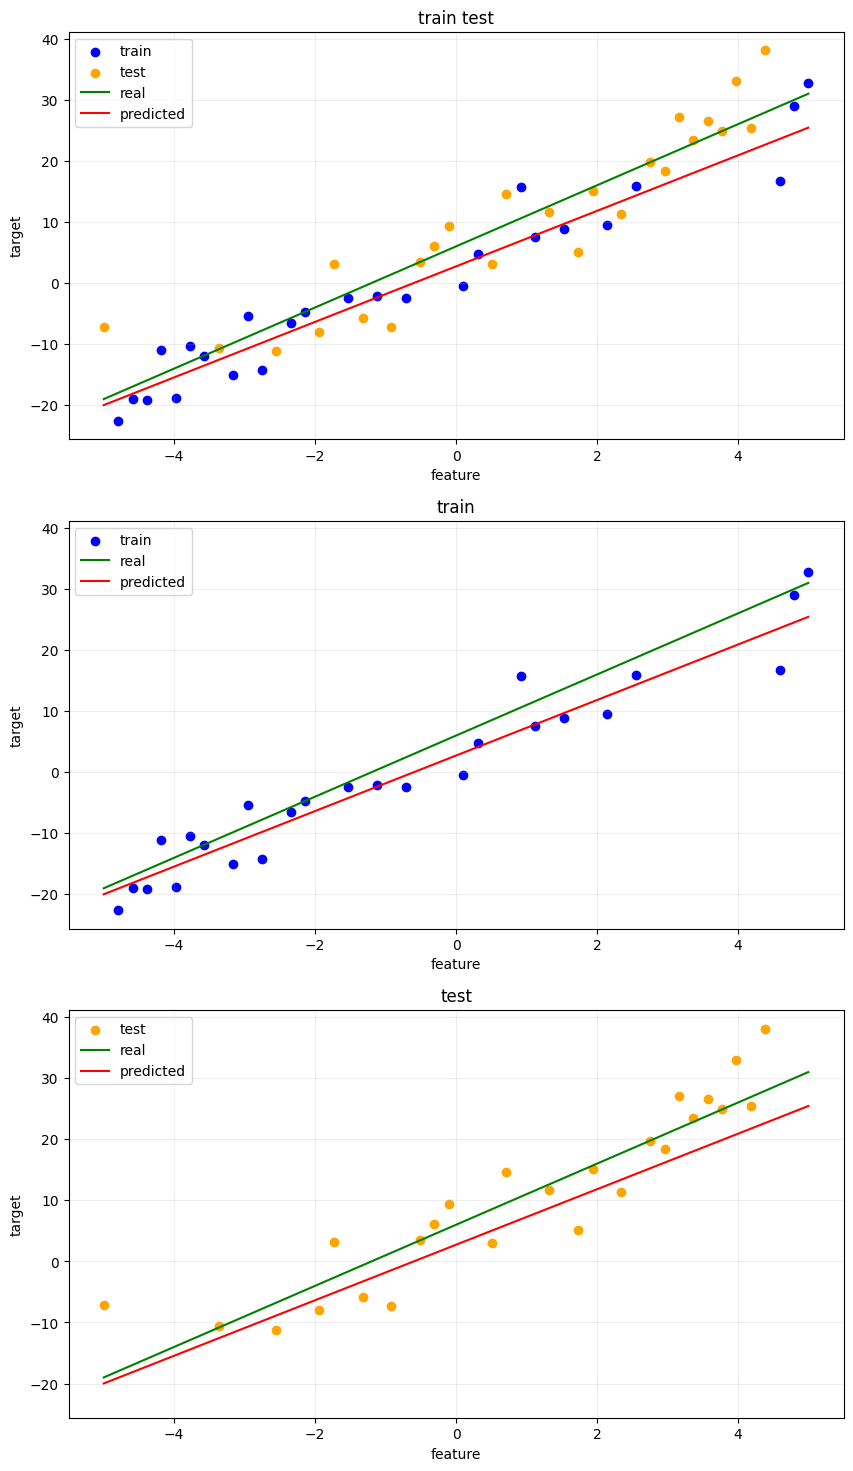

In [ ]:
plt.figure(figsize=(10, 18))

ax = None

for i, types in enumerate([['train', 'test'], ['train'], ['test']]):
    ax = plt.subplot(3, 1, i + 1, sharey=ax)
    if 'train' in types:
        plt.scatter(X_train, y_train, label='train', c='b')
    if 'test' in types:
        plt.scatter(X_test, y_test, label='test', c='orange')

    plt.plot(X, linear_expression(X), label='real', c='g')
    plt.plot(X, lr.predict(X[:, np.newaxis]), label='predicted', c='r')

    plt.ylabel('target')
    plt.xlabel('feature')
    plt.title(" ".join(types))
    plt.grid(alpha=0.2)
    plt.legend()

plt.show()

In [ ]:
arr = np.random.normal(size=(2,)

**Выводы по численным признакам:**
- **Customer_Age:** выбросов нет, распределение нормальное и вопросов не вызывает.
- **Dependent_count:** тут тоже всё хорошо, можно ничего не делать.
- **Months_on_book:** в принципе всё не плохо, но стоит посмотреть более внимательно на значения, возможно есть выбросы.
- **Total_Relationship_Count:** всё хорошо, можно ничего не делать.
- **Months_Inactive_12_mon** стоит посмотреть есть ли выбросы.
- **Contacts_Count_12_mon:** также стоит посмотреть на выбросы.
- **Total_Revolving_Bal:** тут, вроде, всё не плохо, но некоторые вопросы вызывает второй пик.
- **Avg_Open_To_Buy:** тут уже всё сильно хуже с распределением, много значений за доверительным диапазоном.
- **Total_Amt_Chng_Q4_Q1:** тут 100% есть выбросы, стоит проанализировать этот признак подробнее.
- **Total_Trans_Amt:** тут вообще 3 пика в распределении, возможно стоит дескритизировать признак.
- **Total_Trans_Ct:** тут всё не плохо, но стоит посмотреть на выбросы.
- **Total_Ct_Chng_Q4_Q1:** много выбросов, нужно их обрабатывать.
- **Avg_Utilization_Ratio:** тут всё хорошо, ничего делать не нужно. 